In [ ]:
#提高流量好方法     不再執行
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000

一、研究子主題:如何從現有的台灣經濟新聞標題中，分辨何時的事件會對市場造成負面影響?

二、專案目標:由於脫歐相關新聞中同時包含對股市會造成正面影響及負面影響的資訊，只透過單一關鍵字(中美貿易戰)不一定能看出該新聞對市場判斷的影響，因此希望透過數據探勘及機器學習，找出經濟新聞標題常見關鍵字與中美貿易戰事件正負面的關係。 真正能代表脫歐相關新聞中，分別代表正負面事件的常見關鍵詞。

三、研究方式: 透過PYTHON進行資料找尋、整理和分析，用xlwt將資料存成csv。再透過結疤、nltk情緒分析找出正負面關鍵詞，用sklearn進行K-means分群分析，並用matplotlib製作出視覺化圖表，以找出真正能代表中美貿易戰相關新聞中，分別代表正負面事件的常見關鍵詞。

四、研究步驟:
1. 設定想研究的資料目標、事件和資料範圍(時間、項目)
2. 透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
3. 再用網址逐一獲得3000多篇文章中的時間、標題及簡介
4. 將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
5. 使用nltk情緒分析判定正面及負面詞彙
6. 計算每天正負詞彙量的比例
7. 決定分群數量
8. 用k means分出群
9. k means及nltk分類法的小結論

1.設定想研究的資料目標、事件和資料範圍(時間、項目)
為了判斷接下來一年內中貿易戰新聞對於股市投資人的影響，我們將時間軸往回推一年(2018/6~2019/5)，並以經濟日報作為台灣部分新聞的主要來源。希望能夠確認如經濟日報這類的權威性文章對台灣etf投資人會有怎麼樣的影響，首先以台灣元大50etf投資人的行為當成研究目標。

2.透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
我們發現經濟日報會將與中美貿易戰相關的新聞加上「貿易戰」的標籤，並可透過搜尋此標籤找到過去的相關新聞，並呈現在151個頁面中。
由於這151個頁面中會多次重複同樣的新聞網址，導致抓取到的新聞網址數多達30萬個，甚至超過excel列數，因此存了六個檔案，但後來覺得應該只要一個檔案但持續換行就好。

In [1]:
# #-------------------------------------收集經濟日報有貿易戰tag的文章網址---------勿再執行
import sys
import os
import requests, json, csv, datetime
import re
from xlwt import *
from xlrd import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
break_point = str()
udn_a_list = []
udn_a_href_list_all = []
udn_a_href_list_news_addr = []
url = 'https://money.udn.com/search/tagging/1001/貿易戰/3'
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(1,70):
    if row_1 > 65530:
        break_point = g
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址.csv')

In [2]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(71,110):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址2.csv')

In [3]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(96,120):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址3.csv')

In [4]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(114,140):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址4.csv')

In [5]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(130,150):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址5.csv')

In [6]:
#---------------已儲存勿再執行
row_1 = 0
file1 = Workbook(encoding = 'utf-8')
table1 = file1.add_sheet('文字內容')
for count in range(145,155):
    if row_1 > 65530:
        break_point = g
        print(count)
        break 
    udn_url_twse = 'https://money.udn.com/search/tagging/1001/貿易戰/'+str(count)
    time.sleep(1)
    udn_res = requests.get(udn_url_twse)
    udn_res.encoding = "UTF-8"
    udn_soup = BeautifulSoup(udn_res.text)
    #print(udn_soup)
    udn_a_list_o = udn_soup.find_all("a")
    #print(udn_a_list_o)
    for l in udn_a_list_o:
        cn1 = l.name
        udn_a_list.append(cn1)
        try:
            cn2 = l['href']
            udn_a_href_list_all.append(cn2)
        except:
            t=1
    for g in udn_a_href_list_all:
        if 'https://money.udn.com/money/story/' in g:
            udn_a_href_list_news_addr.append(g)
            table1.write(row_1,0,g)
            row_1 += 1 
            if row_1 > 65530:
                break_point = g
                print(g)
                print(count)
                break 
            #print(row_1)         
#print(udn_a_href_list_news_addr)
file1.save('C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址6.csv')

2.透過爬蟲經濟日報，找出有貿易戰標籤的新聞網址
在其他地方整理好重複的網址資訊，發現過去一年內共有3083則與貿易戰相關的新聞，並存成csv檔案。

In [2]:
import xlrd
udn_a_href_list_news_addr_short =  []
file_r = 'C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址新.csv'
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for y in range(3083):
    udn_a_href_list_news_addr_short.append(sheet_1.cell_value(rowx=y,colx=0))   
print(udn_a_href_list_news_addr_short[-3])

https://money.udn.com/money/story/5641/3238233


In [ ]:
3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
讀入網址檔案，並逐一獲得需要的內容，存成csv檔案。(過程中被擋了超級多次，後來發現使用管院網路就不會被擋)

In [1]:
#--------------------抓取經濟日報日期標題簡介，並存成csv、pickle-----勿再執行
import sys
import os
import requests, json, csv, datetime
import re
from xlrd import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
from xlwt import *
udn_a_href_list_news_addr_short_new=[]
file_r = "C:\\Users\\Will\\Desktop\\經濟日報貿易戰新聞網址新.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for t in range(3083):
    udn_a_href_list_news_addr_short_new.append(sheet_1.cell_value(rowx=t,colx=0))
row = 0
file = Workbook(encoding = 'utf-8')
#指定file以utf-8的格式打开
table = file.add_sheet('文字內容')
udn_adr_a_list_o_title = []
udn_adr_a_list_o_description = []
udn_adr_a_list_o_date = []    
print("check p 1")
print(len(udn_a_href_list_news_addr_short_new))
print(udn_a_href_list_news_addr_short_new)
try:
    for adr in udn_a_href_list_news_addr_short_new:
        #time.sleep(1)
        udn_adr_res = requests.get(adr,verify = False)
        udn_adr_res.encoding = "UTF-8"
        udn_adr_soup = BeautifulSoup(udn_adr_res.text)
        #print(udn_adr_soup)
        udn_adr_a_find_title = udn_adr_soup.find_all("meta",property="og:title")
        udn_adr_a_list_o_title.append(udn_adr_a_find_title[0]['content'])
        udn_adr_a_find_description = udn_adr_soup.find_all("meta",attrs={'name':"description"})
        udn_adr_a_list_o_description.append(udn_adr_a_find_description[0]['content'])
        udn_adr_a_find_date = udn_adr_soup.find_all("meta",attrs={'name':"date"})
        table.write(row,0,udn_adr_a_find_date[0]['content'])
        table.write(row,1,udn_adr_a_find_title[0]['content'])
        table.write(row,2,udn_adr_a_find_description[0]['content'])
        row +=1
        #print(row)
    print(udn_adr_a_list_o_title[-3])
    print(udn_adr_a_list_o_description[-3])
    print(udn_adr_a_list_o_date[-3])
    file.save('C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv')
except BaseException:
    file.save('C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv')
    print(udn_adr_a_list_o_title)
    print(udn_adr_a_list_o_description)
    print(udn_adr_a_list_o_date)

3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
再從csv中拿取資料，轉換成list

In [4]:
#-----------------取得經濟日報文字內容
from xlrd import *
from xlwt import *
import pickle
all_udn_news_data_dict = {'date':[],'title':[],'summary':[]}
file_r = "C:\\Users\\Will\\Desktop\\經濟日報文字內容2.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
for t in range(3083):
    all_udn_news_data_dict['date'].append(sheet_1.cell_value(rowx=t,colx=0))
for t in range(3083):
    all_udn_news_data_dict['title'].append(sheet_1.cell_value(rowx=t,colx=1))
for t in range(3083):
    all_udn_news_data_dict['summary'].append(sheet_1.cell_value(rowx=t,colx=2))
# file = open('經濟日報內容.pickle', 'wb')
# pickle.dump(all_udn_news_data_dict, file)
# file.close()

In [5]:
# print(udn_adr_a_list_o_title)
# print(len(udn_adr_a_list_o_title))
# print(udn_adr_a_list_o_date)
udn_adr_a_list_o_date = all_udn_news_data_dict['date']
udn_adr_a_list_o_title = all_udn_news_data_dict['title']
udn_adr_a_list_o_description = all_udn_news_data_dict['summary']

In [ ]:
3.再用網址逐一獲得3000多篇文章中的時間、標題及簡介
整理成可用資料
整理成以時間為key的dict

In [2]:
import datetime
today = datetime.date.today()
date_list = []
data_size_date = 340
for i in range(1,data_size_date):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
    date_list.append(str_date)
print(date_list)

In [3]:
#------------整理成以時間為key的dict
udn_title_date_dict = {}
udn_description_date_dict = {}
udn_adr_a_list_o_date_n = []
for t in date_list:
    udn_title_date_dict[t] = []
    udn_description_date_dict[t] = [] 
for y in range(len(udn_adr_a_list_o_date)):
    yy = udn_adr_a_list_o_date[y]
    y1 = str()
    #print(str(y))
    for r in range(10):
        y1 += yy[r]
    udn_adr_a_list_o_date_n.append(y1)
for t in date_list:
    for u in range(len(udn_adr_a_list_o_date)):
        if t == udn_adr_a_list_o_date_n[u]:
            udn_title_date_dict[t].append(udn_adr_a_list_o_title[u])
            udn_description_date_dict[t].append(udn_adr_a_list_o_description[u])
# print(udn_adr_a_list_o_date_n)
# print(udn_adr_a_list_o_date)
# print(udn_description_date_dict)

In [ ]:
4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
先將所有文字整合成單一文字檔或字串，用結疤找出最重要的關鍵字

In [4]:
import jieba
from jieba.analyse import extract_tags as et
import codecs
from time import time
from operator import itemgetter
from tqdm import tnrange, tqdm_notebook
import tqdm
print(len(udn_adr_a_list_o_title))
total_title_str = str()
total_description_str = str()
key_word_title_list =[]
key_word_description_list =[]
key_word_title_list_2 =[]
key_word_description_list_2 =[]
for t in range(len(udn_adr_a_list_o_title)):
    total_title_str += str(udn_adr_a_list_o_title[t])
    total_description_str += str(udn_adr_a_list_o_description[t])
for i in tnrange(100, desc='1st loop'):
    for t in range(20):
        total_title_str += str(udn_adr_a_list_o_title[t*130])
        total_description_str += str(udn_adr_a_list_o_description[t*130])
print("check p 1")

4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
找出標題最重要的關鍵字，並列成清單

In [29]:
from jieba.analyse import extract_tags as et
key_word_title_list = []
tag_title=list(et(total_title_str,topK=50, allowPOS=['n','ns','nr','na'],withWeight=True))
print("check p 4")
for t in tag_title:
    key_word_title_list.append(t[0])
print(key_word_title_list)
#print(key_word_description_list_2)

check p 4
['經濟', '產業', '日報', '市場', '熱點', '證券', '國際', '焦點', '金融', '觀點', '外匯', '中國', '美國', '關稅', '報告', '脈動', '報台', '期貨', '台股', '指數', '中美', '大陸', '財經', '報川', '天地', '話題', '專家', '熱門', '壓力', '稅務法', '電子', '匯率', '蘋果', '匯市', '變數', '戰衝', '區間', '訂單', '亞洲', '楊金龍', '國家', '機會', '台灣', '加碼', '手機', '戰延', '鄭崇華', '均線', '大事', '時刻']


4.將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
使用nltk分類 輪流以不同關鍵詞為主 找相似詞。目前的文字都算中性，情緒分析不一定有用，結果發現nltk情緒分析只適合英文，中文會全被視為中性

In [30]:
#---------------title 翻譯
import jieba.analyse
from nltk.corpus import sinica_treebank
import nltk
from googletrans import Translator
translator = Translator()
trans_to_en_list_title = [] # 翻譯後的英文list
trans_to_en_dict_title = {} # 英中對照dict
for des in key_word_title_list:
    trans_to_en_title = translator.translate(str(des)).text #翻譯
    trans_to_en_list_title.append(trans_to_en_title)
    trans_to_en_dict_title[str(trans_to_en_title)] = des
print(trans_to_en_list_title,trans_to_en_dict_title)

['economic', 'industry', 'daily', 'market', 'hot spot', 'Securities', 'International', 'focus', 'financial', 'View', 'Foreign exchange', 'China', 'United States', 'tariff', 'report', 'pulsation', 'Bulletin board', 'futures', 'Taiwan stock', 'index', 'Central America', 'mainland', 'Finance', 'Aikawa', 'world', 'topic', 'expert', 'Popular', 'pressure', 'Tax law', 'electronic', 'exchange rate', 'apple', 'Foreign exchange market', 'variable', 'War', 'Interval', 'Order', 'Asia', 'Yang Jinlong', 'country', 'opportunity', 'Taiwan', 'Plus', 'Mobile phone', 'War', 'Zheng Chonghua', 'Moving average', 'Important', 'time'] {'economic': '經濟', 'industry': '產業', 'daily': '日報', 'market': '市場', 'hot spot': '熱點', 'Securities': '證券', 'International': '國際', 'focus': '焦點', 'financial': '金融', 'View': '觀點', 'Foreign exchange': '外匯', 'China': '中國', 'United States': '美國', 'tariff': '關稅', 'report': '報告', 'pulsation': '脈動', 'Bulletin board': '報台', 'futures': '期貨', 'Taiwan stock': '台股', 'index': '指數', 'Central Am

5.使用nltk情緒分析判定正面及負面詞彙
評分，並將正面、負面、中性詞分別存成list

In [31]:
#-----------title 評分
key_word_title_score_dict_en ={}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
sia = SentimentIntensityAnalyzer()
for key_word_en in trans_to_en_list_title:
    key_word_title_score = sia.polarity_scores(key_word_en)
    key_word_title_score_dict_en[str(key_word_en)] = key_word_title_score
print(key_word_title_score_dict_en)
influential_key_word_neg_list_en_title = []
influential_key_word_neu_list_en_title = []
influential_key_word_pos_list_en_title = []
influential_key_word_neg_list_tw_title = []
influential_key_word_neu_list_tw_title = []
influential_key_word_pos_list_tw_title = []
# print(key_word_description_score_dict_en[str(Taiwan)]['compound'])
for word in trans_to_en_list_title:
    if key_word_title_score_dict_en[word]['compound'] < 0:
        influential_key_word_neg_list_en_title.append(word)
        influential_key_word_neg_list_tw_title.append(trans_to_en_dict_title[word])
    if key_word_title_score_dict_en[word]['compound'] == 0:
        influential_key_word_neu_list_en_title.append(word)
        influential_key_word_neu_list_tw_title.append(trans_to_en_dict_title[word])
    if key_word_title_score_dict_en[word]['compound'] > 0:
        influential_key_word_pos_list_en_title.append(word)
        influential_key_word_pos_list_tw_title.append(trans_to_en_dict_title[word])
print(influential_key_word_neg_list_tw_title)
print(influential_key_word_neu_list_tw_title)
print(influential_key_word_pos_list_tw_title)

{'economic': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'industry': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'daily': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'market': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'hot spot': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Securities': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}, 'International': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'focus': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'financial': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'View': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Foreign exchange': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'United States': {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}, 'tariff': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'report': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

6.計算每天正負詞彙量的比例

In [32]:
#------------------title 每天關鍵詞自述 比例分類
count_list_t = []
count_list_num_t = []
count_list_num_p_t = []
count_list_num_n_t = []
count_list_per_p_t = []
count_list_per_n_t = []
date_percentage_dict_p_t = {}
date_percentage_dict_n_t = {}
date_percentage_dict_t = {}
for d in date_list:
    voc_list_title = udn_title_date_dict[str(d)]
    #voc_list_description = udn_description_date_dict[str(d)]
    pos_num = 0
    neg_num = 0
    percentage_of_d_p = 0
    percentage_of_d_n = 0
    for pos_wo in influential_key_word_pos_list_tw_title:
        for r in range(len(voc_list_title)):
            if pos_wo in voc_list_title[r]:
                pos_num+=1
    for neg_wo in influential_key_word_neg_list_tw_title:
        for r in range(len(voc_list_title)):
            if neg_wo in voc_list_title[r]:
                neg_num +=1
    if pos_num+neg_num != 0:
        percentage_of_d_p = pos_num/(pos_num+neg_num)
        percentage_of_d_n = neg_num/(pos_num+neg_num)
        count_list_t.append([percentage_of_d_p,percentage_of_d_n])
        count_list_num_t.append([pos_num,neg_num])
        count_list_num_p_t.append(pos_num)
        count_list_num_n_t.append(neg_num)
        count_list_per_p_t.append(percentage_of_d_p)
        count_list_per_n_t.append(percentage_of_d_n)
    else:
        count_list_t.append([0,0])
        count_list_num_t.append([0,0])
        count_list_num_p_t.append(0)
        count_list_num_n_t.append(0)
        count_list_per_p_t.append(0)
        count_list_per_n_t.append(0)
    date_percentage_dict_p_t[str(d)] = percentage_of_d_p
    date_percentage_dict_n_t[str(d)] = percentage_of_d_n
    date_percentage_dict_t[str(d)] = ([percentage_of_d_p,percentage_of_d_n])
#print(date_percentage_dict)    
print(count_list_t)

[[0, 0], [0.8888888888888888, 0.1111111111111111], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.8333333333333334, 0.16666666666666666], [1.0, 0.0], [0.8571428571428571, 0.14285714285714285], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.6666666666666666, 0.3333333333333333], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [0, 0], [0, 0], [0.5, 0.5], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0, 0], [1.0, 0.0], [0, 0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0,

7.決定分群數量


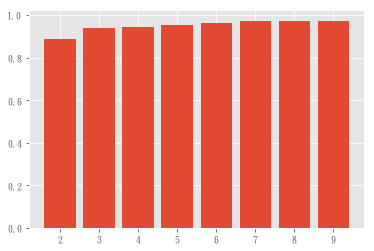

[0.8891151976846485, 0.9372156355908499, 0.9416934844991879, 0.9521856508402198, 0.9634435778090273, 0.9700198987562716, 0.9727865268424818, 0.9712132721718819]


In [33]:
#------------title 
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs_t = []
ks = range(2,10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list_t)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg_t = metrics.silhouette_score(count_list_t, cluster_labels)
    silhouette_avgs_t.append(silhouette_avg_t)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs_t)
plt.show()
print(silhouette_avgs_t)

8.用k means分出群

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


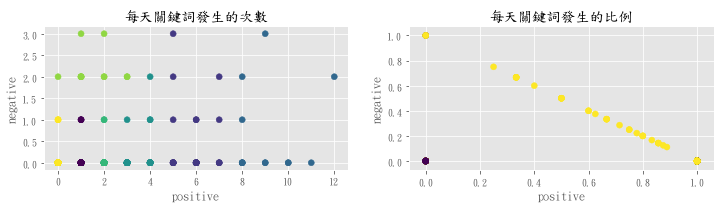

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0]


In [34]:
#---------------title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
plt.sca(ax1)
y_pred_num = cluster.KMeans(n_clusters=7).fit_predict(count_list_num_t)
plt.title('每天關鍵詞發生的次數')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_num_p_t, count_list_num_n_t,c=y_pred_num)
plt.sca(ax2)
y_pred_per = cluster.KMeans(n_clusters=7).fit_predict(count_list)
plt.title('每天關鍵詞發生的比例')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_per_p_t, count_list_per_n_t,c=y_pred_per)
plt.show()
print(y_pred_per)

以下用description再做一次結疤整理、情緒分析及kmeans

In [28]:
from jieba.analyse import extract_tags as et
key_word_description_list = []
#for i in tnrange(100, desc='3st loop'):
tag_description=list(et(total_description_str,topK=50, allowPOS=['n','ns','nr','na'],withWeight=True))
#tag_description_2=jieba.analyse.textrank(total_description_str, withWeight=True)
print("check p 3")
#TD-IDF
# for t in tag_title:
#     print(u'方法1'": %s\t\t weight: %f" % (t[0],t[1]))
# #Textrank
# for x, w in tag_title_2:
#     print(u'方法2'": %s\t\t weight: %f" % (x, w))
for t in tag_description:
    key_word_description_list.append(t[0])
print(key_word_description_list)

check p 3
['中國', '美國', '市場', '經濟', '指數', '美中', '台灣', '關稅', '台股', '大陸', '國家', '企業', '雙方', '因應', '資金', '銀行', '中美', '電子', '產品', '財經', '台商', '產業', '亞洲', '代工', '客戶', '董事', '台幣', '總裁', '全球', '東南亞', '訂單', '台達', '法人', '加徵', '川普', '總統', '產線', '終場', '股價', '瑞軒', '軍隊', '匯率', '風險', '半導體', '機會', '權值', '國際', '財報', '股市', '蘋果']


In [35]:
#------------description 翻譯
import jieba.analyse
from nltk.corpus import sinica_treebank
import nltk
# import codecs
# sia = SIA()
from googletrans import Translator
translator = Translator()
trans_to_en_list = []
trans_to_en_dict = {}
for des in key_word_description_list:
    trans_to_en = translator.translate(str(des)).text
    trans_to_en_list.append(trans_to_en)
    trans_to_en_dict[str(trans_to_en)] = des
print(trans_to_en_list,trans_to_en_dict)

['China', 'United States', 'market', 'economic', 'index', 'US and China', 'Taiwan', 'tariff', 'Taiwan stock', 'mainland', 'country', 'enterprise', 'both sides', 'In response', 'funds', 'bank', 'Central America', 'electronic', 'product', 'Finance', 'Taiwanese business', 'industry', 'Asia', 'Foundry', 'client', 'director', 'Taiwan dollar', 'President', 'global', 'Southeast Asia', 'Order', 'Delta', 'Corporation', 'Add', 'Trump', 'president', 'Production line', 'Final', 'share price', 'Ruixuan', 'army', 'exchange rate', 'risk', 'semiconductor', 'opportunity', 'Weight', 'International', 'Financial report', 'stock market', 'apple'] {'China': '中國', 'United States': '美國', 'market': '市場', 'economic': '經濟', 'index': '指數', 'US and China': '美中', 'Taiwan': '台灣', 'tariff': '關稅', 'Taiwan stock': '台股', 'mainland': '大陸', 'country': '國家', 'enterprise': '企業', 'both sides': '雙方', 'In response': '因應', 'funds': '資金', 'bank': '銀行', 'Central America': '中美', 'electronic': '電子', 'product': '產品', 'Finance': '財經'

In [36]:
#------------------description 評分
key_word_description_score_dict_en ={}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
sia = SentimentIntensityAnalyzer()
for key_word_en in trans_to_en_list:
    key_word_description_score = sia.polarity_scores(key_word_en)
    key_word_description_score_dict_en[str(key_word_en)] = key_word_description_score
print(key_word_description_score_dict_en)
influential_key_word_neg_list_en = []
influential_key_word_neu_list_en = []
influential_key_word_pos_list_en = []
influential_key_word_neg_list_tw = []
influential_key_word_neu_list_tw = []
influential_key_word_pos_list_tw = []
# print(key_word_description_score_dict_en[str(Taiwan)]['compound'])
for word in trans_to_en_list:
    if key_word_description_score_dict_en[word]['compound'] < 0:
        influential_key_word_neg_list_en.append(word)
        influential_key_word_neg_list_tw.append(trans_to_en_dict[word])
    if key_word_description_score_dict_en[word]['compound'] == 0:
        influential_key_word_neu_list_en.append(word)
        influential_key_word_neu_list_tw.append(trans_to_en_dict[word])
    if key_word_description_score_dict_en[word]['compound'] > 0:
        influential_key_word_pos_list_en.append(word)
        influential_key_word_pos_list_tw.append(trans_to_en_dict[word])
print(influential_key_word_neg_list_tw)
print(influential_key_word_neu_list_tw)
print(influential_key_word_pos_list_tw)

{'China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'United States': {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}, 'market': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'economic': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'index': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'US and China': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Taiwan': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'tariff': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Taiwan stock': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'mainland': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'country': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'enterprise': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'both sides': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'In response': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'funds': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [7]:
#------------------description 每天關鍵詞自述 比例分類
count_list = []
count_list_num = []
count_list_num_p = []
count_list_num_n = []
count_list_per_p = []
count_list_per_n = []
date_percentage_dict_p = {}
date_percentage_dict_n = {}
date_percentage_dict = {}
for d in date_list:
    voc_list_title = udn_title_date_dict[str(d)]
    voc_list_description = udn_description_date_dict[str(d)]
    pos_num = 0
    neg_num = 0
    percentage_of_d_p = 0
    percentage_of_d_n = 0
    for pos_wo in influential_key_word_pos_list_tw:
        for r in range(len(voc_list_description)):
            if pos_wo in voc_list_description[r]:
                pos_num+=1
    for neg_wo in influential_key_word_neg_list_tw:
        for r in range(len(voc_list_description)):
            if neg_wo in voc_list_description[r]:
                neg_num +=1
    if pos_num+neg_num != 0:
        percentage_of_d_p = pos_num/(pos_num+neg_num)
        percentage_of_d_n = neg_num/(pos_num+neg_num)
        count_list.append([percentage_of_d_p,percentage_of_d_n])
        count_list_num.append([pos_num,neg_num])
        count_list_num_p.append(pos_num)
        count_list_num_n.append(neg_num)
        count_list_per_p.append(percentage_of_d_p)
        count_list_per_n.append(percentage_of_d_n)
    else:
        count_list.append([0,0])
        count_list_num.append([0,0])
        count_list_num_p.append(0)
        count_list_num_n.append(0)
        count_list_per_p.append(0)
        count_list_per_n.append(0)
    date_percentage_dict_p[str(d)] = percentage_of_d_p
    date_percentage_dict_n[str(d)] = percentage_of_d_n
    date_percentage_dict[str(d)] = ([percentage_of_d_p,percentage_of_d_n])
#print(date_percentage_dict)    
#print(count_list)

決定分群數量 使用metrics.silhouette_score決定分群數量，可知差異有限但分成十群效果可能最好。然而此處為了方便操作先以三群為試驗。

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  

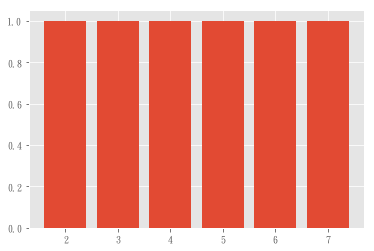

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [37]:
#------------des 
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2,8)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(count_list, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

用k means分出群 用sklearn.cluster.KMeans，以各天正負關鍵詞比例及數量XY軸，將日期分成三群，並視覺化分群

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


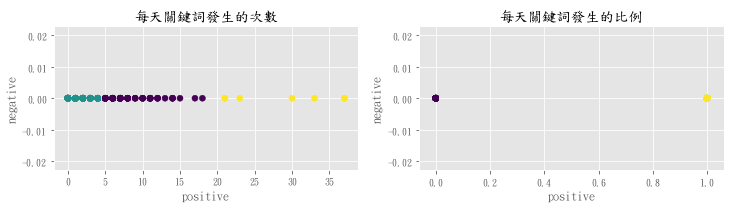

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0]


In [21]:
#---------------des
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
plt.sca(ax1)
y_pred_num = cluster.KMeans(n_clusters=3).fit_predict(count_list_num)
plt.title('每天關鍵詞發生的次數')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_num_p, count_list_num_n,c=y_pred_num)
plt.sca(ax2)
y_pred_per = cluster.KMeans(n_clusters=3).fit_predict(count_list)
plt.title('每天關鍵詞發生的比例')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_per_p, count_list_per_n,c=y_pred_per)
plt.show()
print(y_pred_per)

In [117]:
import xlrd 
# # 以xlrd打開表格給book
# book = xlrd.open_workbook("C:\\Users\\Will\\Desktop\\經濟日報文字內容1.csv")
# # 獲取工作表的方法之一，用下標。
# sheel_1 = book.sheet_by_index(0)
# # 打印第一個工作表中行0列1的值，用下標。
# print(sheel_1.cell_value(rowx=0,colx=0))
file_r = "C:\\Users\\Will\\Desktop\\經濟日報文字內容1.csv"
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
print(sheet_1.cell_value(rowx=0,colx=0))
print(sheet_1.cell_value(rowx=0,colx=1))
print(sheet_1.cell_value(rowx=0,colx=2))

2019/05/27 20:51:34
諾貝爾經濟學獎得主羅默：貿易戰將持續 各國宜應變 | 美中貿易戰 | 國際 | 經濟日報
2018年諾貝爾經濟學獎得主羅默（Paul M. Romer）27日抵台指出，美國這波景氣循環仍將持續。美中貿易戰也將...


9.k means及nltk分類法的小結論
這次使用nltk情緒分析，從經濟日報的標題、簡介找出適當的正負面關鍵詞清單，再用kmeans分群分析找出類別，歲未進行t檢定測試，但可以看出成效不彰，因為正負面關鍵詞清單內容過少，可能有三項原因:
1.經濟日報內容或用字習慣相當中性，以陳述事實為主，很少評論
2.nltk情緒分析過於嚴苛，難以分出足夠數量的正負面情緒
3.大多會經常出現的詞都為中性，應該用整句的方式判斷情緒更佳
考量到這三點論，我們彙集英國路透社和bbc的資料，並使用完整句子來判斷情緒，降低媒體自身用詞習慣的影響。